 here we will be using MNIST dataset of handwritten digits
 
 total images : 70000
 
 train images : 60000
 
 test images : 10000

 image size: 28 * 28 pixels


In [ ]:


import torch
import torchvision

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate=0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


for experiments we use random seed which can be any random number

the cuDNN has non deterministic algorithms : False is used to disable this functionality


training batch size: 64

testing  batch size : 1000

For MNIST dataset :

The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset, we'll take them as a given here.

In [ ]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train = True , download = True , transform = torchvision.transforms.Compose([
                                                                                                                       torchvision.transforms.ToTensor(),
                                                                                                                       torchvision.transforms.Normalize((0.1307,),(0.3081,))
    ])),batch_size = batch_size_train,shuffle = True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train = True , download = True , transform = torchvision.transforms.Compose([
                                                                                                                       torchvision.transforms.ToTensor(),
                                                                                                                       torchvision.transforms.Normalize((0.1307,),(0.3081,))
    ])),batch_size = batch_size_test,shuffle = True)


In [ ]:
examples =  enumerate(test_loader)

batch_idx , (example_data,example_targets) = next(examples)

In [ ]:
example_data.shape


torch.Size([1000, 1, 28, 28])

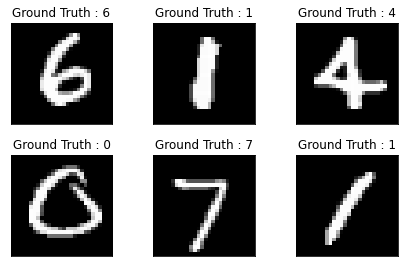

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap = 'gray' , interpolation = 'none')
  plt.title("Ground Truth : {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])



In [ ]:
example_data.size

<function Tensor.size>

**Building the Networks**

2-D cnn : 2
linear layer : 2
Activation function : rectified linear unit(Relu)
2 Dropout layers for Regularization



In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [ ]:
class Net(nn.Module) :                            #here Module is the base super class to all the neural network modules
    def __init__(self) : 
      super(Net,self).__init__()
      self.conv1 = nn.Conv2d(1, 10 ,kernel_size=5)
      self.conv2 = nn.Conv2d(10 ,20 ,kernel_size = 5)
      self.conv2_drop=nn.Dropout2d()
      self.fc1 = nn.Linear(320,50)
      self.fc2 = nn.Linear(50,10)

      def forward(self,x) : 
        x= F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x=F.dropout( x, training =self.training)
        x=self.fc2(x)
        return F.log_softmax(x)



In [ ]:
network = Net()
